df overview,  determine problems and key questions to perform task, rename columns,  dealing with duplicates , missed data , timestamp  and screen record test

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
mvp=["n.a.","?","NA","n/a", "na", "--"]

In [3]:
df=pd.read_csv("Salary_Survey.csv", na_values=mvp)

In [4]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(28178, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28178 entries, 0 to 28177
Data columns (total 23 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                                                                                             28085 non-null  object 
 1   How old are you?                                                                                             

In [7]:
non_null_counts = df.count()
print(non_null_counts)

Timestamp                                                                                                                                                                                                                               28085
How old are you?                                                                                                                                                                                                                        28085
What industry do you work in?                                                                                                                                                                                                           28011
Job title                                                                                                                                                                                                                               28083
If your job title needs additional context, plea

In [8]:
#no non-null values -all values in the columns 17-22 are missing or null,we can delete them
# rename titles for columns change text to number, number to relevant title
df.columns = range(len(df.columns))

In [9]:
#lets replase numbers for text format to rename columns 
new_column_names = ["column_" + str(i) for i in range(len(df.columns))]
df.columns = new_column_names

In [10]:
df.head()

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#take down colimns without values
df.drop(columns=['column_17','column_18','column_19','column_20','column_21','column_22'], inplace=True)

In [12]:
#rename columns 
df = df.rename(columns={"column_0":"Timestump","column_1": "Age","column_16":"Gender","column_15": "highest education level"})

In [13]:
df = df.rename(columns={"column_2":"Industry","column_3": "Job title","column_4":"Job context","column_5":"Annual Salary","column_6":"Bonus","column_7":"Currency","column_8":"Currency other","column_9":"Income context"})

In [14]:
df = df.rename(columns={"column_10":"Country","column_11": "State","column_12":"City","column_13": "Work_Exp","column_14": "Rel_Exp"})

In [15]:
#detecting duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (92, 17)


In [16]:
# Print duplicate rows with null values
print(duplicate_rows_df[duplicate_rows_df.isnull().any(axis=1)])

      Timestump  Age Industry Job title Job context Annual Salary  Bonus  \
28086       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28087       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28088       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28089       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28090       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
...         ...  ...      ...       ...         ...           ...    ...   
28173       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28174       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28175       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28176       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28177       NaN  NaN      NaN       NaN         NaN           NaN    NaN   

      Currency Currency other Income context Country State City Work_Exp  \
28086      

In [17]:
#we can exclude now  93 duplicates rows ,as we did for columns before
# drop all rows with NaN values - we can lost almost all data ,
df = df.iloc[:-93]



In [18]:
#review 
df.tail(4)

,Timestump,Age,Industry,Job title,Job context,Annual Salary,Bonus,Currency,Currency other,Income context,Country,State,City,Work_Exp,Rel_Exp,highest education level,Gender
28081,9/25/2024 21:34:43,45-54,Education (Primary/Secondary),Curriculum Writer,I am a freelance contract curriculum writer fo...,70000,0.0,USD,NaN,NaN,United States,South Carolina,Bennettsville,21 - 30 years,21 - 30 years,Master's degree,Woman
28082,9/30/2024 10:52:30,55-64,Government and Public Administration,Clerical Officer,NaN,28600,NaN,EUR,NaN,NaN,Ireland,NaN,Dublin,21 - 30 years,1 year or less,"Professional degree (MD, JD, etc.)",Man
28083,10/4/2024 13:05:24,18-24,Computing or Tech,Software Engineering Co-Op,I was an Intern,56160,0.0,USD,NaN,NaN,United States,Rhode Island,Jhonston,1 year or less,1 year or less,College degree,Man
28084,10/7/2024 5:17:56,65 or over,Social networks,Content creator,NaN,2000000,NaN,USD,NaN,NaN,Taiwan,"Utah, Wisconsin",Milwaukee,41 years or more,2 - 4 years,PhD,Non-binary


In [19]:
# identifying columns with missing data and deciding how to handle  missing values
print(df.isnull().sum())


Timestump                      0
Age                            0
Industry                      74
Job title                      2
Job context                20819
Annual Salary                  0
Bonus                       7305
Currency                       0
Currency other             27877
Income context             25041
Country                        1
State                       5026
City                          87
Work_Exp                       0
Rel_Exp                        0
highest education level      222
Gender                       171
dtype: int64


# determine  target variable(“Annual salary” ), dropping irrelevant columns,  # Main target - annual salary, year mention in a title ,values in a Timestump nonsuffisient impact , 'Job context'- most of the data missed  and   similar for  "indastry  and Job title, categotical variable ' Income context' do not impact  numerical data in Target variable 


#

In [20]:
#take down non relevant to the target variable columns Timestamp ,'Job context','Income context'
# Main target - annual salary, year mention in a title , 
df.drop(columns=['Timestump','Job context','Income context','Currency other'], inplace=True)

In [21]:
#assuming 171 missed values in a column "Gender",replase them with 'No Gender ' 

df['Gender'] = df['Gender'].fillna('No Gender ')

In [22]:
# identifying  unique values in a  column
df['Gender'].unique()


array(['Woman', 'Non-binary', 'Man', 'No Gender ',
       'Other or prefer not to answer', 'Prefer not to answer'],
      dtype=object)

In [23]:
#Replace with "NA" (No answer) non gender related  categories (missing values)  using the replace() method:
df['Gender'] = df['Gender'].replace(['Prefer not to answer', 'Other or prefer not to answer'], 'Other')

In [24]:
#identifying unique duplicates in a columns
df.drop_duplicates('Gender', keep='first')

,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Work_Exp,Rel_Exp,highest education level,Gender
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,"62,000",NaN,USD,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man
171,25-34,Government and Public Administration,Program Analyst,"117,500",1500.0,USD,USA,NaN,Washington DC,8 - 10 years,5-7 years,Master's degree,No Gender
321,35-44,Computing or Tech,Software Engineer,"156,000",189000.0,USD,United States,Massachusetts,Metro Boston,21 - 30 years,21 - 30 years,Master's degree,Other


In [25]:
#standartise "'highest education level" variables 
#replace missing values,rename all   confused values with most close unic realted names
#replace missing values with (Not applicable ')  "NA"
df['highest education level'] = df['highest education level'].fillna('NA')

In [26]:
#  determine unique categories in Higest  Education column
array = df["highest education level"].unique() 
print(array)

["Master's degree" 'College degree' 'PhD' 'NA' 'Some college'
 'High School' 'Professional degree (MD, JD, etc.)']


In [27]:
#rename values
df['highest education level'] = df['highest education level'].replace(['Professional degree (MD, JD, etc.)','Master\'s degree' ], 'MD')


In [28]:
#rename values
df['highest education level'] = df['highest education level'].replace(['Some college','College degree'], 'CD')


In [29]:
# Determine the distribution of categorical variables 
# Frequency table for 'highest education'Education_distribution = df['highest education level'].value_counts()
Education_distribution = df['highest education level'].value_counts()
print(Education_distribution)

CD             15601
MD             10196
PhD             1427
High School      639
NA               222
Name: highest education level, dtype: int64


#create a new variable "Demographics"   that could provide ifferent approach to analising releation betveen "Gender" ,Education"   and Salary   

In [30]:
#  'df' with columns 'Highest Education Level' and 'Gender'
df['Demographics'] = df['highest education level'] + '_' + df['Gender']

In [31]:
# identifying  categories/values in a new   column
df['Demographics'].unique()

array(['MD_Woman', 'CD_Non-binary', 'CD_Woman', 'MD_Man', 'PhD_Woman',
       'CD_Man', 'NA_Woman', 'MD_Non-binary', 'High School_Man',
       'PhD_Man', 'High School_Woman', 'MD_No Gender ', 'PhD_Non-binary',
       'High School_Non-binary', 'MD_Other', 'PhD_Other', 'CD_No Gender ',
       'CD_Other', 'NA_No Gender ', 'NA_Man', 'High School_Other',
       'PhD_No Gender ', 'NA_Other', 'NA_Non-binary',
       'High School_No Gender '], dtype=object)

In [32]:
#from this poit it is possible to see repation betveen Gender and Education
# Frequency table for 'Job title'
Demographics_distribution = df['Demographics'].value_counts()

print(Demographics_distribution)

CD_Woman                  11581
MD_Woman                   8209
CD_Man                     3323
MD_Man                     1599
PhD_Woman                  1097
CD_Non-binary               468
High School_Woman           358
PhD_Man                     277
High School_Man             250
MD_Non-binary               232
CD_Other                    177
NA_Woman                    131
MD_Other                     93
MD_No Gender                 63
CD_No Gender                 52
NA_Man                       44
NA_No Gender                 41
PhD_Non-binary               24
High School_Non-binary       20
PhD_Other                    17
PhD_No Gender                12
High School_Other             8
NA_Other                      4
High School_No Gender         3
NA_Non-binary                 2
Name: Demographics, dtype: int64


In [82]:
# Filter for specific groups
filtered_df = df[df['Demographics'].isin(['CD_Woman', 'MD_Woman', 'PhD_Woman'])]

# Calculate the total count for filtered groups
filtered_count = filtered_df['Demographics'].count()

print("Total count for filtered groups:", filtered_count)


Total count for filtered groups: 20704


In [34]:
#  lets drop single variables 
df.drop(columns=['highest education level','Gender'], inplace=True)

In [35]:
#review updated df 
df.head(2)

,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Work_Exp,Rel_Exp,Demographics
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,MD_Woman
1,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,CD_Non-binary


#clean data for range columns ‘Age’ , ‘Work Exp’ , ‘ Rel_exp’ :extract text, find unique groups /

In [36]:
# identifying columns with missing data in updated df
print(df.isnull().sum())


Age                 0
Industry           74
Job title           2
Annual Salary       0
Bonus            7305
Currency            0
Country             1
State            5026
City               87
Work_Exp            0
Rel_Exp             0
Demographics        0
dtype: int64


In [37]:
#replace missing values with (Unknown')/'NA'
#  for missed values 'City',replace with equal value from 'Country'
df['Industry'] = df['Industry'].fillna('Unknown')
df['Job title'] = df['Job title'].fillna('Unknown')
df['Bonus']=df['Bonus'].fillna('NA')
df['Country']=df['Country'].fillna('Unknown')
df['State']=df['State'].fillna('NA')
df['City']=df['City'].fillna(df['Country'])
   


In [38]:
#identifying unique duplicates in a columns
#review updated DF
df.drop_duplicates('Industry', keep='first')

,Age,Industry,Job title,Annual Salary,Bonus,Currency,Country,State,City,Work_Exp,Rel_Exp,Demographics
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,MD_Woman
1,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,NA,Cambridge,8 - 10 years,5-7 years,CD_Non-binary
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NA,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,CD_Woman
3,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,CD_Woman
6,25-34,Publishing,Publishing Assistant,"33,000",2000.0,USD,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,CD_Woman
...,...,...,...,...,...,...,...,...,...,...,...,...
27987,65 or over,Plumbing,Manager,30000,10000.0,ZAR,South Africa,NA,Johannesburg,41 years or more,41 years or more,High School_Man
27996,18-24,I'm currently a student and don't have a job,Unknown,0,0.0,USD,U.S.A,Pennsylvania,U.S.A,2 - 4 years,2 - 4 years,CD_Man
28020,25-34,Student,Student,0,0.0,USD,US,Illinois,US,1 year or less,1 year or less,CD_Other
28024,25-34,Wine & Spirits,Marketing Manager,105000,5000.0,USD,U.S.,California,Napa,5-7 years,5-7 years,CD_Woman


In [39]:
# identifying  number of unoque  values in 'Industry'
unique_industries = df['Industry'].nunique()
print("Number of unique industries:", unique_industries)

Number of unique industries: 1221


In [40]:
#review updated df
print(df.isnull().sum())

Age              0
Industry         0
Job title        0
Annual Salary    0
Bonus            0
Currency         0
Country          0
State            0
City             0
Work_Exp         0
Rel_Exp          0
Demographics     0
dtype: int64


In [41]:
# identifying  categories/values in a'Work_Exp' column
df['Work_Exp'].unique()

array(['5-7 years', '8 - 10 years', '2 - 4 years', '21 - 30 years',
       '11 - 20 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [42]:
# identifying  categories/values in a targeted  variable 'Annual Salary' column
df['Country'].unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'Spain', 'us',
       'Usa', 'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'India', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Argentina', 'Great Britain ', 'US ', 'United State',
       'U.S.A', 'Denmark', 'U.S.A.', 'America', 'Netherlands',
       'netherlands', 'England ', 'united states of america', 'Ireland ',
       'Switzerland', 'Netherlands ', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Germany ',
       'Malaysia', 'Mexico ', 'United Stated', 'South Africa ', 'Belgium',
       'Northern Ireland', 'u.s.', 'South Africa', 'UNITED STATES',
       'united States', 'Sweden', 'Hong K

After filtering unique values in a 'Country' string, Identifying missliding data and manually replase it :extract Country name or consider it missing, and  maark as 'Unknown'  using   .replace({'old_value1': 'new_value1'}).Using replace method clean 'Country'   from 

In [43]:
#using reolace method , clean names form '.'
df['Country'] = df['Country'].str.replace('\.', '', regex=True)

In [44]:
#Remove parentheses using regular expression and replace method 
df['Country'] = df['Country'].str.replace(r'\(|\)', '', regex=True)

In [45]:
# Replace the emoji with 'USA'
df['Country'] = df['Country'].str.replace('🇺🇸', 'USA')

i  got a "SyntaxError: invalid decimal literal" ,seems  Python  misinterpreting the '3rd' in "3rd party assessment" as a decimal number for "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located"  , I  use regular expression to  handle this 

In [46]:
import re

df['Country'] = df['Country'].str.replace(r"We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located", "Unknown", regex=True)

In [47]:
df['Country'] = df['Country'].str.replace('Worldwide based in US but short term trips aroudn the world', 'USA')

In [48]:
df['Country'] = df['Country'].str.replace(r"United States I work from home and my clients are all over the US/Canada/PR","USA", regex=True)

In [49]:
# Replace values with 'USA'
df['Country'] = df['Country'].replace({'For the United States government, but posted overseas': 'USA',
                                        'USA, but for foreign gov\'t': 'USA',
                                        'US govt employee overseas, country withheld': 'USA'})

In [50]:

df['Country'] = df['Country'].str.replace(r"$2,17584/year is deducted for benefits", "Unknown", regex=True)

In [51]:
df['Country'] = df['Country'].str.replace(r"I earn commission on sales If I meet quota, I'm guaranteed another 16k min Last year i earned an additional 27k It's not uncommon for people in my space to earn 100k+ after commission", "Unknown", regex=True)

In [52]:
df['Country'] = df['Country'].str.replace('USA company is based in a USA territory, I work remote', 'USA')

In [53]:
df['Country'] = df['Country'].str.replace('I am located in Canada but I work for a company in the US', 'USA')

In [54]:
df['Country'] = df['Country'].str.replace(r"I earn commission on sales If I meet quota, I'm guaranteed another 16k min Last year i earned an additional 27k It's not uncommon for people in my space to earn 100k+ after commission", "Unknown", regex=True)

In [55]:
# Regular expression to match variations of USA and United States  use $   to mark end ($) of the string, 
usa_pattern = re.compile(r"^(USA|US|United States)$", flags=re.IGNORECASE)
# Replace matches with "USA", case-insensitive
df['Country'] = df['Country'].str.replace(usa_pattern, 'USA', regex=True)


In [56]:
df['Country'] = df['Country'].str.replace('United States','USA')


I naoticed multiply USA entityes to standartise it , i use strip()    and upper()   functions 

In [57]:
# make   all upper 
df['Country'] = df['Country'].str.upper()

In [58]:
df['Country'] = df['Country'].str.strip()

I found a  464 group with name USA OF AMERICA'  ,I replase it with USA, but use  case sensitive function  case=False)

In [59]:
df['Country'] = df['Country'].str.replace('USA OF AMERICA', 'USA', case=False)

In [60]:
# Frequency table for 'country   updated
Country_distribution = df['Country'].value_counts()

print(Country_distribution)

USA               22982
CANADA             1678
UK                  704
UNITED KINGDOM      634
AUSTRALIA           389
                  ...  
COTE D'IVOIRE         1
AUSTRALI              1
CUBA                  1
UNTED STATES          1
BURMA                 1
Name: Country, Length: 239, dtype: int64


Work with targrted variable Annual salary ,standartise ,find outliers ,top  higest and lowest salaryes .,correlation  with  USA  and Demografic 

In [61]:
# identifying  categories/values in a targeted  variable 'Annual Salary' column
df['Annual Salary'].unique()

array(['55,000', '54,600', '34,000', ..., '7000', '37741', '53060'],
      dtype=object)

In [62]:
# Clean data from ',', convert to integrets 


In [63]:
df['Annual Salary'] = df['Annual Salary'].str.replace(',','').astype(int)



In [64]:
#find outliers , top 5 salaryes
df = df.sort_values('Annual Salary', ascending=False)

print(df['Annual Salary'].head(5))

28055    6000070000
11454     870000000
18984     180000000
27902     120000000
3605      102000000
Name: Annual Salary, dtype: int64


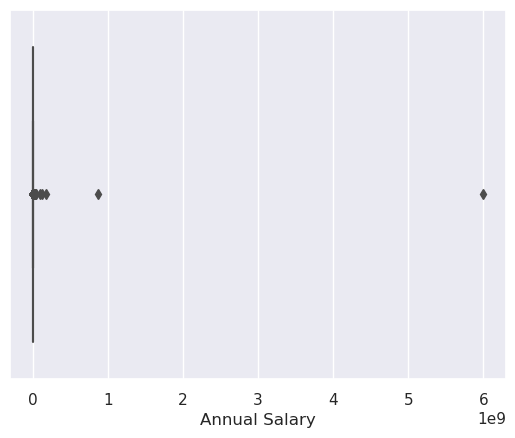

In [65]:
#review outliers
sns.boxplot(x=df['Annual Salary'])
plt.show()

In [66]:
# Filter rows where 'Annual Salary' is greater than or equal to 1000,review   with Currency 
filtered_df = df[df['Annual Salary'] >= 10000]

# Print the last 5 rows of the filtered DataFrame

print(df[['Annual Salary', 'Currency']].head(5))

       Annual Salary Currency
28055     6000070000      CAD
11454      870000000    Other
18984      180000000    Other
27902      120000000    Other
3605       102000000      USD


In [67]:
print(df[['Annual Salary', 'Currency']].tail(5))

       Annual Salary Currency
20470              0      USD
8739               0      USD
26562              0      USD
27996              0      USD
13537              0      USD


Currency column :  filter irrelevant duplicated, drop rows from DF

In [68]:
#assuming ,Annual salary can not be less then 10 000 , filter and drop  relevant rows
Salary_dupl_rows_df = df[(df.duplicated(subset=['Annual Salary'], keep=False)) & (df['Annual Salary'].astype(str).isin(['1', '00', '0'])) | (df['Annual Salary'] <= 10000)]

# Drop duplicate rows

df = df.drop(Salary_dupl_rows_df.index)

In [69]:
print (df['Annual Salary'].tail(5))

27134    11000
19434    10800
27631    10700
14982    10500
15191    10500
Name: Annual Salary, dtype: int64


In [70]:
#  determine unique categories in currency column
array = df["Currency"].unique() 
print(array)

['CAD' 'Other' 'USD' 'JPY' 'SEK' 'ZAR' 'CHF' 'AUD/NZD' 'GBP' 'HKD' 'EUR']


In [71]:

# make   all upper 
df['Currency'] = df['Currency'].str.upper()

In [72]:
#  determine unique categories  upgate 
array = df["Currency"].unique() 
print(array)

['CAD' 'OTHER' 'USD' 'JPY' 'SEK' 'ZAR' 'CHF' 'AUD/NZD' 'GBP' 'HKD' 'EUR']


In [73]:
# Identify duplicate rows where 'Currency' is 'OTHER'
duplicate_rows_df = df[df.duplicated(subset=['Currency'], keep=False) & (df['Currency'] == 'OTHER')]

# Drop duplicate rows
df = df.drop(duplicate_rows_df.index)

In [74]:
# Frequency table for 'Industry'
currency_distribution = df['Currency'].value_counts()

print(currency_distribution)

USD        23288
CAD         1667
GBP         1580
EUR          617
AUD/NZD      503
SEK           37
CHF           37
JPY           23
ZAR           15
HKD            4
Name: Currency, dtype: int64


In [75]:
# Determine the distribution of categorical variables (e.g., Industry, Job title, Gender).
# Frequency table for 'Industry'
industry_distribution = df['Industry'].value_counts()

print(industry_distribution)



Computing or Tech                       4630
Education (Higher Education)            2447
Nonprofits                              2404
Health care                             1879
Government and Public Administration    1877
                                        ... 
project management                         1
Hospital                                   1
Environmental Planning                     1
Architecture/Construction                  1
Freelance Journalism                       1
Name: Industry, Length: 1198, dtype: int64


In [76]:
# Frequency table for 'Job title
# Frequency table for 'Job title'
Job_distribution = df['Job title'].value_counts()

print(Job_distribution)

Software Engineer                           283
Project Manager                             227
Director                                    198
Senior Software Engineer                    194
Program Manager                             152
                                           ... 
Assistant Director Business Intelligence      1
Associate Research Scientist                  1
Associate Director, Culture and Talent        1
Senior Digital Content Manager                1
Software Engineer Technical Support           1
Name: Job title, Length: 14213, dtype: int64


create a new DF  for USD currency 

In [77]:
from datetime import datetime 

In [78]:
# Getting current date and time
current_time = datetime.now()

# Formatting the date and time in a readable format:
formatted_time = current_time.strftime('%B %d, %Y, %H:%M:%S')

In [79]:
# Print the formatted date and time
print(f"Salary_survey_0.ipynb was last run on: {formatted_time}")

Salary_survey_0.ipynb was last run on: November 03, 2024, 21:23:23


NEW DF for   USA  country ,find outliers  .For targeted category 'Annial salary'=  find MEan  and median

In [80]:
 #create new DF  for   USA country 

filtered_df = df[df['Country'] == 'USA']

print(filtered_df[['Currency', 'Annual Salary','Country','Demographics','Job title','Rel_Exp','Industry']])


      Currency  Annual Salary Country   Demographics  \
28021      USD       10000000     USA  MD_Non-binary   
26466      USD        5000044     USA       MD_Woman   
15795      JPY        3600000     USA  CD_Non-binary   
2124       USD        3000000     USA       MD_Woman   
28043      USD        2600000     USA         NA_Man   
...        ...            ...     ...            ...   
27585      USD          11500     USA       MD_Woman   
18106      USD          11100     USA         CD_Man   
25830      USD          11000     USA         MD_Man   
27631      USD          10700     USA         CD_Man   
14982      USD          10500     USA         CD_Man   

                                 Job title        Rel_Exp  \
28021                                  bum   8 - 10 years   
26466                 Inside sales manager  21 - 30 years   
15795       Japanese to English Translator    2 - 4 years   
2124                        Owner and CEO   21 - 30 years   
28043                 

In [81]:
# Calculate IQR and identify outliers
Q1 = filtered_df['Annual Salary'].quantile(0.25)
Q3 = filtered_df['Annual Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = filtered_df[(filtered_df['Annual Salary'] < Q1 - 1.5 * IQR) | (filtered_df['Annual Salary'] > Q3 + 1.5 * IQR)]

# Remove outliers (adjust as needed)
filtered_df_cleaned = filtered_df.drop(outliers.index)

# Calculate mean and median for cleaned data
mean_salary = filtered_df_cleaned['Annual Salary'].mean()
median_salary = filtered_df_cleaned['Annual Salary'].median()

print("Mean Annual Salary for USA (after cleaning):", mean_salary)
print("Median Annual Salary for USA (after cleaning):", median_salary)

Mean Annual Salary for USA (after cleaning): 84369.82975718647
Median Annual Salary for USA (after cleaning): 76000.0


In [84]:
# Find top salary perfomance for  USA
filtered_df = df[df['Country'] == 'USA']

# Sort by 'Annual Salary' in descending order
sorted_df = filtered_df.sort_values(by='Annual Salary', ascending=False)

# Select the top 'n' rows (adjust 'n' as needed)
top_n_salaries = sorted_df.head(n=10)  # For example, top 10 salaries

# Print the desired columns
print(top_n_salaries[['Annual Salary', 'State', 'Industry','Demographics']])

       Annual Salary                 State  \
28021       10000000                Alaska   
26466        5000044            New Jersey   
15795        3600000               Alabama   
2124         3000000              New York   
28043        2600000               Florida   
5755         1900000           Connecticut   
6783         1650000         Massachusetts   
9238         1334782  District of Columbia   
26558        1300000              Virginia   
17708        1260000            Washington   

                                   Industry   Demographics  
28021                               Unknown  MD_Non-binary  
26466                                 Sales       MD_Woman  
15795                         Entertainment  CD_Non-binary  
2124                           Art & Design       MD_Woman  
28043                     Computing or Tech         NA_Man  
5755                            Health care       MD_Woman  
6783                      Computing or Tech         MD_Man  
9238 

/tmp/ipykernel_6987/1999795943.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


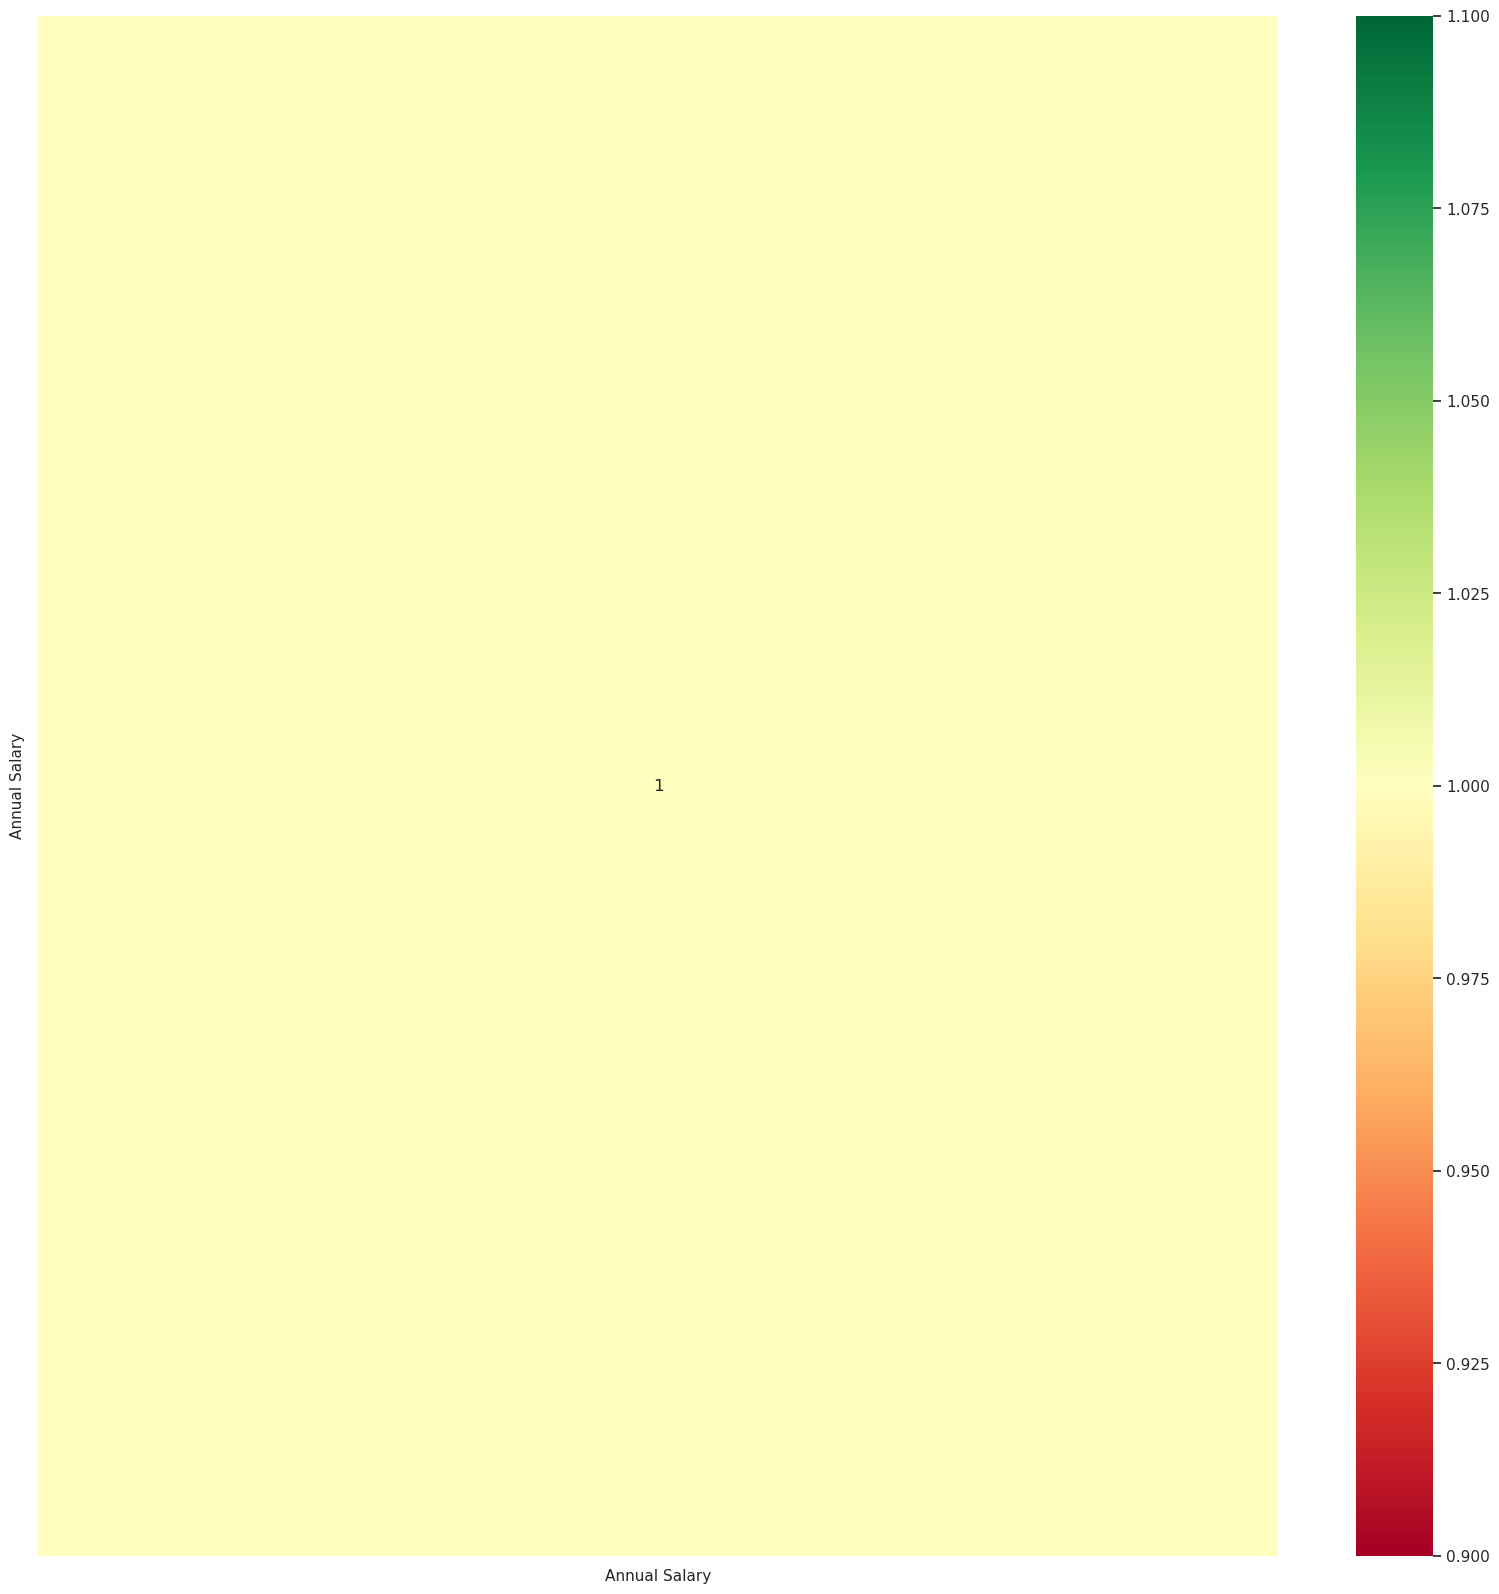

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
data = filtered_df = df[df['Country'] == 'USA']
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")